# Libraries

In [1]:
!nvidia-smi

Sat Dec  7 09:49:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  | 00000000:07:00.0 Off |                    0 |
| N/A   43C    P0             275W / 400W |  36596MiB / 40960MiB |     74%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import subprocess

# Run the nvidia-smi command and capture the output
result = subprocess.run(['nvidia-smi', '--query-compute-apps=pid,process_name,used_memory', '--format=csv'], stdout=subprocess.PIPE)

# Decode the output to a string
output = result.stdout.decode('utf-8')

# Print the output
print(output)

pid, process_name, used_gpu_memory [MiB]
624444, [Not Found], 926 MiB
3747522, python, 866 MiB
3752418, /data/students/juan/anaconda3/envs/venv/bin/python, 34766 MiB
3766716, python, 804 MiB
3750870, python, 35148 MiB
3579641, python, 18458 MiB
3579884, python, 16248 MiB
3622566, python, 696 MiB
3679430, python3, 20164 MiB
2608783, /data/students/jhon/anaconda3/envs/venv/bin/python, 12046 MiB
3506119, python, 24260 MiB



In [3]:
!pip install ultralytics pycocotools scikit-image wandb gradio ipywidgets

In [4]:
from ultralytics import YOLO
import ultralytics

# Copying Dataset to ME6 Folder

## Copying Dataset

In [5]:
import os
import shutil
from pathlib import Path
from tqdm.notebook import tqdm
from collections import Counter

def ensure_dir(path):
    Path(path).mkdir(parents=True, exist_ok=True)

def batch_copy(src_dir, dst_dir):
    # Create destination if doesn't exist
    ensure_dir(dst_dir)
    
    # Get list of files to copy
    files = list(Path(src_dir).glob('*.jpg'))
    
    # List to store files without permission
    no_permission_files = []

    # Copy with progress bar
    for file in tqdm(files, desc="Copying files"):
        dst_file = Path(dst_dir) / file.name
        if dst_file.exists():
            continue  # Skip if file already exists
        try:
            shutil.copy2(file, dst_dir)
        except PermissionError:
            # print(f"Permission denied for {file}. Trying with sudo...")
            # os.system(f'sudo cp "{file}" "{dst_dir}"')
            no_permission_files.append(file)
        except Exception as e:
            print(f"Error copying {file}: {e}")
    
    return no_permission_files


In [16]:
# Define source and destination directories
# src = '/data/detection/grocery/dataset_v3/images/val'
# src = '/data/students/christian/machine_exercises/me6/categories_missing/cat3/val'
src = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/images/val'
dst = '/data/students/christian/machine_exercises/me6/data_det/images/val'

# Run the batch copy function and get the list of files without permission
no_permission_files = batch_copy(src, dst)

# Store the filenames of the files without permission into a list
no_permission_filenames = [file.name for file in no_permission_files]

# Count the number of files in each category
category_counts = Counter([str(file.name)[:2] for file in Path(src).glob('*.jpg')])
no_permission_category_counts = Counter([str(file.name)[:2] for file in no_permission_files])

# Print the stats in alphabetical order
print("Category stats:")
for category in sorted(category_counts.keys()):
    count = category_counts[category]
    no_perm_count = no_permission_category_counts.get(category, 0)
    with_perm_count = count - no_perm_count
    print(f"Category {category}: Total: {count}, With Permission: {with_perm_count}, Without Permission: {no_perm_count}")

# Print the list of filenames without permission
print("Files without permission:")
print(no_permission_filenames)


Copying files:   0%|          | 0/14 [00:00<?, ?it/s]

Category stats:
Category 21: Total: 14, With Permission: 14, Without Permission: 0
Files without permission:
[]


In [11]:
# Define source and destination directories
src = '/data/students/christian/machine_exercises/me5/data_det/images/val'
dst = '/data/students/christian/machine_exercises/me6/data_det/images/val'

# Run the batch copy function and get the list of files without permission
no_permission_files = batch_copy(src, dst)

# Store the filenames of the files without permission into a list
no_permission_filenames = [file.name for file in no_permission_files]

# Count the number of files in each category
category_counts = Counter([str(file.name)[:2] for file in Path(src).glob('*.jpg')])
no_permission_category_counts = Counter([str(file.name)[:2] for file in no_permission_files])

# Print the stats in alphabetical order
print("Category stats:")
for category in sorted(category_counts.keys()):
    count = category_counts[category]
    no_perm_count = no_permission_category_counts.get(category, 0)
    with_perm_count = count - no_perm_count
    print(f"Category {category}: Total: {count}, With Permission: {with_perm_count}, Without Permission: {no_perm_count}")

# Print the list of filenames without permission
print("Files without permission:")
print(no_permission_filenames)


Copying files:   0%|          | 0/845 [00:00<?, ?it/s]

Category stats:
Category 01: Total: 37, With Permission: 37, Without Permission: 0
Category 02: Total: 40, With Permission: 40, Without Permission: 0
Category 03: Total: 42, With Permission: 42, Without Permission: 0
Category 04: Total: 30, With Permission: 30, Without Permission: 0
Category 05: Total: 37, With Permission: 37, Without Permission: 0
Category 06: Total: 40, With Permission: 40, Without Permission: 0
Category 07: Total: 41, With Permission: 41, Without Permission: 0
Category 08: Total: 33, With Permission: 33, Without Permission: 0
Category 09: Total: 30, With Permission: 30, Without Permission: 0
Category 10: Total: 35, With Permission: 35, Without Permission: 0
Category 11: Total: 37, With Permission: 37, Without Permission: 0
Category 12: Total: 35, With Permission: 35, Without Permission: 0
Category 13: Total: 31, With Permission: 31, Without Permission: 0
Category 14: Total: 26, With Permission: 26, Without Permission: 0
Category 15: Total: 37, With Permission: 37, W

## Check Content Similarity

In [17]:
import os

def check_directories_same_contents(directories):
    """
    Check if the given directories have the same contents.

    Parameters:
    - directories (list): List of directory paths to check.

    Returns:
    - bool: True if all directories have the same contents, False otherwise.
    """
    if not directories:
        return True

    # Get the list of files in the first directory
    first_dir_files = set(os.listdir(directories[0]))

    for directory in directories[1:]:
        current_dir_files = set(os.listdir(directory))
        if first_dir_files != current_dir_files:
            return False

    return True


# Example usage
directories = [
    '/data/students/christian/machine_exercises/me6/data_det/images/train',
    '/data/students/christian/machine_exercises/me6/data_seg/images/train',
]

same_contents = check_directories_same_contents(directories)
print(f"Checking directories: {directories[0]} and {directories[1]}")
print(f"Directories have the same contents: {same_contents}\n")


# Example usage
directories = [
    '/data/students/christian/machine_exercises/me6/data_det/images/val',
    '/data/students/christian/machine_exercises/me6/data_seg/images/val',
]

same_contents = check_directories_same_contents(directories)
print(f"Checking directories: {directories[0]} and {directories[1]}")
print(f"Directories have the same contents: {same_contents}")

Checking directories: /data/students/christian/machine_exercises/me6/data_det/images/train and /data/students/christian/machine_exercises/me6/data_seg/images/train
Directories have the same contents: True

Checking directories: /data/students/christian/machine_exercises/me6/data_det/images/val and /data/students/christian/machine_exercises/me6/data_seg/images/val
Directories have the same contents: True


## Combining JSON Files for Old and New Datasets

In [14]:
import json

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def save_json(data, file_path):
    with open(file_path, 'w') as f:
        json.dump(data, f)

def merge_coco_jsons(json1, json2, json3):
    merged = {
        "images": json1["images"] + json2["images"] + json3["images"],
        "annotations": json1["annotations"] + json2["annotations"] + json3["annotations"],
        "categories": json1["categories"]
    }
    
    # Ensure unique IDs for images and annotations
    image_id_offset1 = max(img['id'] for img in json1['images']) + 1
    image_id_offset2 = image_id_offset1 + max(img['id'] for img in json2['images']) + 1
    annotation_id_offset1 = max(ann['id'] for ann in json1['annotations']) + 1
    annotation_id_offset2 = annotation_id_offset1 + max(ann['id'] for ann in json2['annotations']) + 1
    
    for img in merged['images'][len(json1['images']):len(json1['images']) + len(json2['images'])]:
        img['id'] += image_id_offset1
    
    for img in merged['images'][len(json1['images']) + len(json2['images']):]:
        img['id'] += image_id_offset2
    
    for ann in merged['annotations'][len(json1['annotations']):len(json1['annotations']) + len(json2['annotations'])]:
        ann['id'] += annotation_id_offset1
        ann['image_id'] += image_id_offset1
    
    for ann in merged['annotations'][len(json1['annotations']) + len(json2['annotations']):]:
        ann['id'] += annotation_id_offset2
        ann['image_id'] += image_id_offset2
    
    return merged

# Load the JSON files
instances_train1 = load_json('/data/students/christian/machine_exercises/me6/instances_train_old.json')
instances_train2 = load_json('/data/students/christian/machine_exercises/me6/instances_train_new.json')
instances_train3 = load_json('/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_train.json')
instances_val1 = load_json('/data/students/christian/machine_exercises/me6/instances_val_old.json')
instances_val2 = load_json('/data/students/christian/machine_exercises/me6/instances_val_new.json')
instances_val3 = load_json('/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_val.json')

# Merge the JSON files
merged_train = merge_coco_jsons(instances_train1, instances_train2, instances_train3)
merged_val = merge_coco_jsons(instances_val1, instances_val2, instances_val3)

# Save the merged JSON files
save_json(merged_train, '/data/students/christian/machine_exercises/me6/instances_train_final.json')
save_json(merged_val, '/data/students/christian/machine_exercises/me6/instances_val_final.json')

In [15]:
import json

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def count_items(json_data):
    return len(json_data['images']), len(json_data['annotations'])

# Load the JSON files
instances_train1 = load_json('/data/students/christian/machine_exercises/me6/instances_train_old.json')
instances_train2 = load_json('/data/students/christian/machine_exercises/me6/instances_train_new.json')
instances_train3 = load_json('/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_train.json')
instances_val1 = load_json('/data/students/christian/machine_exercises/me6/instances_val_old.json')
instances_val2 = load_json('/data/students/christian/machine_exercises/me6/instances_val_new.json')
instances_val3 = load_json('/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_val.json')

# Count items in each JSON file
train1_counts = count_items(instances_train1)
train2_counts = count_items(instances_train2)
train3_counts = count_items(instances_train3)
val1_counts = count_items(instances_val1)
val2_counts = count_items(instances_val2)
val3_counts = count_items(instances_val3)

# Load the merged JSON files
merged_train = load_json('/data/students/christian/machine_exercises/me6/instances_train_final.json')
merged_val = load_json('/data/students/christian/machine_exercises/me6/instances_val_final.json')

# Count items in the merged JSON files
merged_train_counts = count_items(merged_train)
merged_val_counts = count_items(merged_val)

# Verify the counts
print("Train Images Count:", train1_counts[0] + train2_counts[0] + train3_counts[0], "==", merged_train_counts[0])
print("Train Annotations Count:", train1_counts[1] + train2_counts[1] + train3_counts[1], "==", merged_train_counts[1])
print("Val Images Count:", val1_counts[0] + val2_counts[0] + val3_counts[0], "==", merged_val_counts[0])
print("Val Annotations Count:", val1_counts[1] + val2_counts[1] + val3_counts[1], "==", merged_val_counts[1])

Train Images Count: 9556 == 9556
Train Annotations Count: 21859 == 21859
Val Images Count: 1063 == 1063
Val Annotations Count: 2493 == 2493


In [16]:
def print_sample_entries(json_data, num_entries=3):
    print("Sample Images:", json_data['images'][:num_entries])
    print("Sample Annotations:", json_data['annotations'][:num_entries])
    print("Categories:", json_data['categories'])

# Print sample entries from the merged JSON files
print("Merged Train JSON Samples:")
print_sample_entries(merged_train)

print("\nMerged Val JSON Samples:")
print_sample_entries(merged_val)

Merged Train JSON Samples:
Sample Images: [{'id': 160001, 'dataset_id': 3, 'category_ids': [], 'path': 'images/train/160001.jpg', 'width': 640, 'height': 480, 'file_name': '160001.jpg', 'annotated': False, 'annotating': [], 'num_annotations': 0, 'metadata': {}, 'deleted': False, 'milliseconds': 0, 'events': [], 'regenerate_thumbnail': False}, {'id': 160002, 'dataset_id': 3, 'category_ids': [], 'path': 'images/train/160002.jpg', 'width': 640, 'height': 480, 'file_name': '160002.jpg', 'annotated': False, 'annotating': [], 'num_annotations': 0, 'metadata': {}, 'deleted': False, 'milliseconds': 0, 'events': [], 'regenerate_thumbnail': False}, {'id': 160003, 'dataset_id': 3, 'category_ids': [], 'path': 'images/train/160003.jpg', 'width': 640, 'height': 480, 'file_name': '160003.jpg', 'annotated': False, 'annotating': [], 'num_annotations': 0, 'metadata': {}, 'deleted': False, 'milliseconds': 0, 'events': [], 'regenerate_thumbnail': False}]
Sample Annotations: [{'id': 160001, 'image_id': 160

## Removing Category 25

In [17]:
import os

def print_limited_folder_structure(root_dir, limit=5):
    for root, dirs, files in os.walk(root_dir):
        # Calculate the depth of the current directory
        depth = root.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * depth
        print(f"{indent}{os.path.basename(root)}/")
        
        # Filter for .jpg and .txt files
        jpg_files = [f for f in files if f.lower().endswith('.jpg')][:limit]
        txt_files = [f for f in files if f.lower().endswith('.txt')][:limit]
        
        sub_indent = ' ' * 4 * (depth + 1)
        for file in jpg_files + txt_files:
            print(f"{sub_indent}{file}")

# Example usage
root_directory = '/data/students/christian/machine_exercises/me6'  # Update this path
print_limited_folder_structure(root_directory)

me6/
    runs/
        detect/
            train/
                weights/
        segment/
            train/
                labels_correlogram.jpg
                train_batch1.jpg
                train_batch2.jpg
                train_batch0.jpg
                labels.jpg
                weights/
    data_det_temp_for_cat25/
        labels/
            val/
                250015.txt
                250102.txt
                250019.txt
                250040.txt
            train/
                250029.txt
                250050.txt
                250103.txt
                250023.txt
                250047.txt
        images/
            val/
                250102.jpg
                250015.jpg
                250040.jpg
                250019.jpg
            train/
                250150.jpg
                250056.jpg
                250031.jpg
                250043.jpg
                250119.jpg
    data_det/
        labels/
            val/
                010107.txt
      

In [18]:
import os
import shutil

def transfer_files(src_labels, src_images, dest_labels, dest_images, prefix='25'):
    # Traverse labels directory
    for root, dirs, files in os.walk(src_labels):
        # Determine the relative path to preserve folder structure
        rel_path = os.path.relpath(root, src_labels)
        dest_dir = os.path.join(dest_labels, rel_path)
        os.makedirs(dest_dir, exist_ok=True)
        
        for file in files:
            if file.startswith(prefix) and file.lower().endswith('.txt'):
                src_file = os.path.join(root, file)
                dest_file = os.path.join(dest_dir, file)
                shutil.move(src_file, dest_file)
                print(f"Moved {src_file} to {dest_file}")

    # Traverse images directory
    for root, dirs, files in os.walk(src_images):
        rel_path = os.path.relpath(root, src_images)
        dest_dir = os.path.join(dest_images, rel_path)
        os.makedirs(dest_dir, exist_ok=True)
        
        for file in files:
            if file.startswith(prefix) and file.lower().endswith('.jpg'):
                src_file = os.path.join(root, file)
                dest_file = os.path.join(dest_dir, file)
                shutil.move(src_file, dest_file)
                print(f"Moved {src_file} to {dest_file}")

# Define source and destination directories
src_labels = '/data/students/christian/machine_exercises/me6/data_det/labels'
src_images = '/data/students/christian/machine_exercises/me6/data_det/images'
dest_labels = '/data/students/christian/machine_exercises/me6/data_det_temp_for_cat25/labels'
dest_images = '/data/students/christian/machine_exercises/me6/data_det_temp_for_cat25/images'


# Transfer and delete files
transfer_files(src_labels, src_images, dest_labels, dest_images)

In [ ]:
# Define source and destination directories
src_labels = '/data/students/christian/machine_exercises/me6/data_seg/labels'
src_images = '/data/students/christian/machine_exercises/me6/data_seg/images'
dest_labels = '/data/students/christian/machine_exercises/me6/data_seg_temp_for_cat25/labels'
dest_images = '/data/students/christian/machine_exercises/me6/data_seg_temp_for_cat25/images'


# Transfer and delete files
transfer_files(src_labels, src_images, dest_labels, dest_images)

# Loading Models and Exploration

In [ ]:
# Load a model
# model_det_name = "yolo11x.pt"
# model_seg_name = "yolo11x-seg.pt"
model_det_name = "yolo11n.pt"
model_seg_name = "yolo11n-seg.pt"
    
model_det = YOLO(model_det_name).to('cuda:2')
model_seg = YOLO(model_seg_name).to('cuda:2')

In [15]:
import os
import time
# no nvlink
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "7"


model = "/data/students/christian/machine_exercises/me5/runs/detect/train13/weights/best.pt"

    
model = YOLO(model).to('cuda')

info = model.info()

layers = info[0]  # 319
params_millions = info[1] / 1e6  # 2.59452 M
gflops = info[3]  # 6.47

print(f"Layers: {layers}")
print(f"Parameters: {params_millions:.2f}M")
print(f"GFLOPs: {gflops:.2f}")


# print(f"""{"="*100}

# model_det info: {model.info()}
# model_det device: {model.device}
# model_det names: {model.names}
# model_det transforms: {model.transforms}

# {"="*150}"""
# )

YOLO11n summary: 319 layers, 2,594,520 parameters, 0 gradients, 6.5 GFLOPs
Layers: 319
Parameters: 2.59M
GFLOPs: 6.47


In [16]:
import os
import time
# no nvlink
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "7"


model = "/data/students/christian/machine_exercises/me5/runs/segment/train16/weights/best.pt"

    
model = YOLO(model).to('cuda')

info = model.info()

layers = info[0]  # 319
params_millions = info[1] / 1e6  # 2.59452 M
gflops = info[3]  # 6.47

print(f"Layers: {layers}")
print(f"Parameters: {params_millions:.2f}M")
print(f"GFLOPs: {gflops:.2f}")


# print(f"""{"="*100}

# model_det info: {model.info()}
# model_det device: {model.device}
# model_det names: {model.names}
# model_det transforms: {model.transforms}

# {"="*150}"""
# )

YOLO11n-seg summary: 355 layers, 2,847,288 parameters, 0 gradients, 10.4 GFLOPs
Layers: 355
Parameters: 2.85M
GFLOPs: 10.38



image 1/1 /raid/students/christian/machine_exercises/me6/test.jpg: 480x640 1 toothpaste, 44.3ms
Speed: 1.0ms preprocess, 44.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


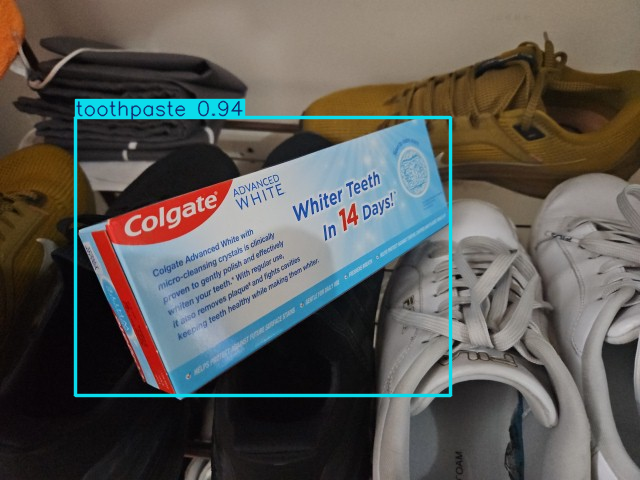

In [11]:
import os
import time
# no nvlink
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"


model = "/data/students/christian/machine_exercises/me5/runs/detect/train13/weights/best.pt"

    
model = YOLO(model)


x = model.predict(source="test.jpg",device="cuda")
x[0].show()

In [10]:
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
Setup complete ✅ (256 CPUs, 1007.7 GB RAM, 468.3/1757.8 GB disk)



image 1/1 /raid/students/christian/machine_exercises/me5/test.jpg: 480x640 1 book, 41.9ms
Speed: 4.2ms preprocess, 41.9ms inference, 411.2ms postprocess per image at shape (1, 3, 480, 640)


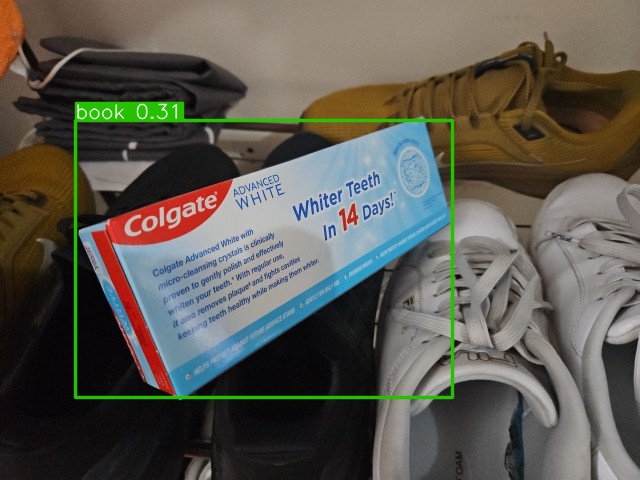

In [7]:
# Perform object detection on an image
results_det = model_det("test.jpg")
results_det[0].show()

In [5]:
ft_model_det_path = "/data/students/christian/machine_exercises/me5/runs/detect/train13/weights/best.pt"
ft_model_det = YOLO(ft_model_det_path).to('cuda:2')


image 1/1 /raid/students/christian/machine_exercises/me5/test.jpg: 480x640 1 toothpaste, 40.3ms
Speed: 5.0ms preprocess, 40.3ms inference, 520.9ms postprocess per image at shape (1, 3, 480, 640)


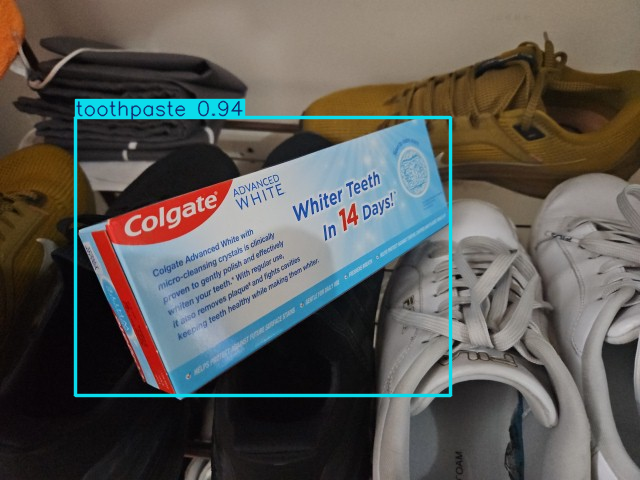

In [6]:
# Perform object detection on an image
results_det = ft_model_det("test.jpg")
results_det[0].show()


image 1/1 /raid/students/christian/machine_exercises/me5/test.jpg: 480x640 2 handbags, 1 remote, 20.5ms
Speed: 1.0ms preprocess, 20.5ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


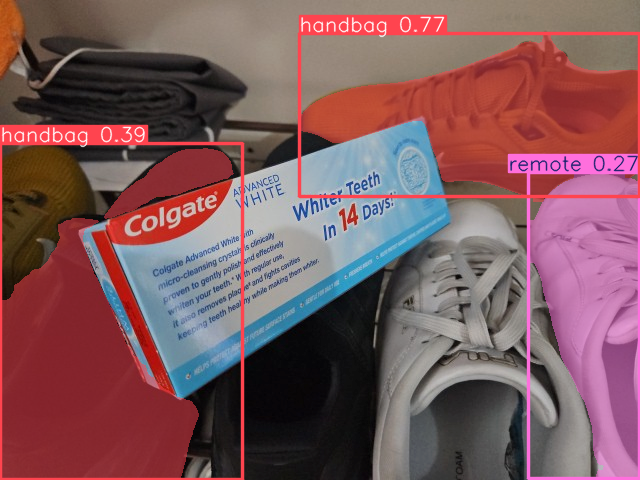

In [8]:
# Perform object segmentation on an image
results_seg = model_seg("test.jpg")
results_seg[0].show()

In [7]:
ft_model_seg_path = "/data/students/christian/machine_exercises/me5/runs/segment/train16/weights/best.pt"
ft_model_seg = YOLO(ft_model_seg_path).to('cuda:2')


image 1/1 /raid/students/christian/machine_exercises/me5/test.jpg: 480x640 1 toothpaste, 16.6ms
Speed: 1.0ms preprocess, 16.6ms inference, 5.2ms postprocess per image at shape (1, 3, 480, 640)


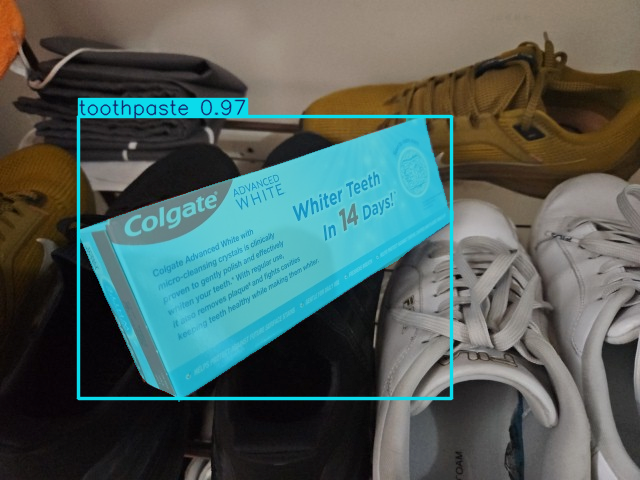

In [8]:
# Perform object segmentation on an image
results_seg = ft_model_seg("test.jpg")
results_seg[0].show()

In [ ]:
import os
import time
from ultralytics import YOLO


# no nvlink
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"


model_path = "/data/students/christian/machine_exercises/me5/runs/detect/train24/weights/best.engine"
model = YOLO(model_path)


results = model.predict(
    source="test.jpg",
    conf=0.6,
    line_width=2,
    show_labels=True,
    show_conf=True,
    device=0,
    half=True, #True
)

results[0].show()

In [8]:
# # Python code to display images with annotations per class using random selection and saving the figure
# import os
# import matplotlib.pyplot as plt
# from pycocotools.coco import COCO
# import skimage.io as io
# from matplotlib.patches import Polygon, Rectangle
# import numpy as np
# import random

# # Paths to the dataset
# data_dir = '/data/detection/grocery/dataset'
# ann_dir = os.path.join(data_dir, 'annotations')
# img_dir = os.path.join(data_dir, 'images')

# # Use the train annotations
# ann_file = os.path.join(ann_dir, 'instances_train.json')
# img_dir_train = os.path.join(img_dir, 'train')

# # Initialize COCO API
# coco = COCO(ann_file)

# # Get category IDs and names
# cat_ids = coco.getCatIds()
# cats = coco.loadCats(cat_ids)
# num_classes = len(cat_ids)
# cat_id_to_name = {cat['id']: cat['name'] for cat in cats}

# # Create a figure
# plt.figure(figsize=(15, 5 * num_classes))

# # Loop over each category
# for idx, cat_id in enumerate(cat_ids):
#     # Get image IDs containing this category
#     img_ids = coco.getImgIds(catIds=cat_id)
#     # Select up to 3 random images
#     selected_img_ids = random.sample(img_ids, min(3, len(img_ids)))

#     for i, img_id in enumerate(selected_img_ids):
#         img = coco.loadImgs(img_id)[0]
#         img_path = os.path.join(img_dir_train, img['file_name'])
#         image = io.imread(img_path)

#         # Create subplot
#         ax = plt.subplot(num_classes, 3, idx * 3 + i + 1)
#         ax.imshow(image)
#         ax.axis('off')

#         # Load annotations for this image and category
#         ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_id)
#         anns = coco.loadAnns(ann_ids)

#         # Draw segmentation masks and bounding boxes
#         for ann in anns:
#             # Draw segmentation mask
#             if 'segmentation' in ann:
#                 if isinstance(ann['segmentation'], list):
#                     # Polygon annotations
#                     for seg in ann['segmentation']:
#                         poly = np.array(seg).reshape((len(seg)//2, 2))
#                         polygon = Polygon(poly, facecolor='none', edgecolor='r', linewidth=2)
#                         ax.add_patch(polygon)
#                 elif isinstance(ann['segmentation'], dict):
#                     # RLE annotations
#                     mask = coco.annToMask(ann)
#                     ax.imshow(mask, alpha=0.5)

#             # Draw bounding box
#             if 'bbox' in ann:
#                 x, y, w, h = ann['bbox']
#                 rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
#                 ax.add_patch(rect)

#         if i == 1:
#             ax.set_title(cat_id_to_name[cat_id])

# plt.tight_layout()
# plt.savefig('annotated_images.png')

# Preprocessing Data

## COCO-YOLO Object Detection

### Old Images (350 each)

In [36]:
import json
import os
from collections import defaultdict

def coco_to_yolo_detection_txt(json_path, images_dir, labels_dir):
    """
    Converts COCO annotations to YOLO detection .txt files.

    Parameters:
    - json_path (str): Path to the COCO JSON file.
    - images_dir (str): Directory where images are stored.
    - labels_dir (str): Directory where YOLO .txt label files will be saved.
    """
    os.makedirs(labels_dir, exist_ok=True)

    with open(json_path, 'r') as f:
        coco = json.load(f)

    categories = coco.get('categories', [])
    images = coco.get('images', [])
    annotations = coco.get('annotations', [])

    # Create category ID to class index mapping
    category_id_to_class = {category['id']: idx for idx, category in enumerate(categories)}

    # Create a mapping from image_id to its annotations
    image_id_to_annotations = defaultdict(list)
    for anno in annotations:
        image_id_to_annotations[anno['image_id']].append(anno)

    for image in images:
        image_id = image['id']
        file_name = image['file_name']
        width = image['width']
        height = image['height']
        image_path = os.path.join(images_dir, file_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        anns = image_id_to_annotations.get(image_id, [])
        if not anns:
            continue  # No annotations for this image

        label_lines = []
        for anno in anns:
            category_id = anno['category_id']
            class_idx = category_id_to_class.get(category_id)
            if class_idx is None:
                continue  # Unknown category

            bbox = anno.get('bbox', [])
            if not bbox or len(bbox) != 4:
                continue  # Invalid bbox

            x, y, bw, bh = bbox
            x_center = (x + bw / 2) / width
            y_center = (y + bh / 2) / height
            w = bw / width
            h = bh / height

            line = f"{class_idx} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}"
            label_lines.append(line)

        if label_lines:
            label_file = os.path.splitext(file_name)[0] + '.txt'
            label_path = os.path.join(labels_dir, label_file)
            with open(label_path, 'w') as lf:
                lf.write("\n".join(label_lines))
            print(f"Saved label: {label_path}")

In [37]:
json_file_path = '/data/students/christian/machine_exercises/me6/instances_train_old.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/train'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_det/labels/train'  # Update this path

coco_to_yolo_detection_txt(json_file_path, images_directory, labels_directory)

json_file_path = '/data/students/christian/machine_exercises/me6/instances_val_old.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/val'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_det/labels/val'  # Update this path

coco_to_yolo_detection_txt(json_file_path, images_directory, labels_directory)

Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160001.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160002.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160003.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160004.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160005.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160006.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160007.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160009.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160010.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/160011.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/l

In [38]:
# post process labels

import os

def update_label_files(labels_base_dir):
    for subset in ['train', 'val']:
    # for subset in ['val']:
        subset_dir = os.path.join(labels_base_dir, subset)
        for filename in os.listdir(subset_dir):
            if filename.endswith('.txt'):
                class_id = filename[:2]
                class_id = str(int(class_id) - 1)
                file_path = os.path.join(subset_dir, filename)
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                updated_lines = []
                # if int(class_id) >= 10:
                #     class_id = str(int(class_id) - 1)
                for line in lines:
                    parts = line.strip().split()
                    if parts:
                        parts[0] = class_id
                        updated_lines.append(' '.join(parts) + '\n')
                with open(file_path, 'w') as file:
                    file.writelines(updated_lines)

In [39]:
labels_directory = '/data/students/christian/machine_exercises/me6/data_det/labels'
update_label_files(labels_directory)

### Additional Images (150 each)

In [40]:
# commented out, since this is only used to 
# get the mapping of the old categories to the new categories

# import json

# def generate_data_yaml(json_path, train_images_dir, val_images_dir, output_yaml_path):


#     with open(json_path, 'r') as f:
#         coco = json.load(f)

#     # Extract class names and assign indices starting from 0
#     categories = coco.get('categories', [])
#     class_names = {idx: category['name'] for idx, category in enumerate(categories)}
#     num_classes = len(class_names)

#     # Prepare YAML content
#     data_yaml = f"""nc: {num_classes}
# names:"""
#     for idx, name in class_names.items():
#         data_yaml += f"\n  {idx}: '{name}'"

#     # Save to data_det.yaml
#     with open(output_yaml_path, 'w') as f:
#         f.write(data_yaml)

#     print(f"data_det.yaml file has been saved to {output_yaml_path}")

# json_file_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_val.json'
# train_images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/train'
# val_images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/val'
# output_yaml_path = '/data/students/christian/machine_exercises/me6/data_det_V3.yaml'

# generate_data_yaml(json_file_path, train_images_directory, val_images_directory, output_yaml_path)

In [41]:
json_file_path = '/data/students/christian/machine_exercises/me6/instances_train_new.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/train'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_det/labels/train'  # Update this path

coco_to_yolo_detection_txt(json_file_path, images_directory, labels_directory)

json_file_path = '/data/students/christian/machine_exercises/me6/instances_val_new.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/val'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_det/labels/val'  # Update this path

coco_to_yolo_detection_txt(json_file_path, images_directory, labels_directory)

Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050351.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050352.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050353.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050354.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050355.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050356.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050358.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050359.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050360.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/050361.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/l

In [42]:
import json
import os

def update_label_classes(json_path, labels_dir):
    # Mapping
    mapping = {
        0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9,
        10: 10, 11: 11, 12: 12, 13: 15, 14: 16, 15: 17, 16: 18,
        17: 19, 18: 20, 19: 21, 20: 22, 21: 23, 22: 13, 23: 14
    }
    
    # Load JSON
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # Get image names
    image_names = [img['file_name'] for img in data['images']]
    
    # Update labels
    for img_name in image_names:
        label_file = os.path.join(labels_dir, os.path.splitext(img_name)[0] + '.txt')
        if os.path.exists(label_file):
            with open(label_file, 'r') as file:
                lines = file.readlines()
            updated_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts:
                    cls = int(parts[0])
                    new_cls = mapping.get(cls, cls)
                    updated_line = ' '.join([str(new_cls)] + parts[1:]) + '\n'
                    updated_lines.append(updated_line)
            with open(label_file, 'w') as file:
                file.writelines(updated_lines)

In [43]:
json_path = '/data/students/christian/machine_exercises/me6/instances_train_new.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_det/labels/train'
update_label_classes(json_path, labels_dir)


json_path = '/data/students/christian/machine_exercises/me6/instances_val_new.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_det/labels/val'
update_label_classes(json_path, labels_dir)

### Missing Images for Some Categories (Soy Sauce)

In [44]:
json_file_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_train.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/train'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_det/labels/train'  # Update this path

coco_to_yolo_detection_txt(json_file_path, images_directory, labels_directory)

json_file_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_val.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_det/images/val'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_det/labels/val'  # Update this path

coco_to_yolo_detection_txt(json_file_path, images_directory, labels_directory)

Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210380.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210381.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210382.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210383.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210384.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210385.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210386.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210387.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210388.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/labels/train/210389.txt
Saved label: /data/students/christian/machine_exercises/me6/data_det/l

In [45]:
json_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_train.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_det/labels/train'
update_label_classes(json_path, labels_dir)


json_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_val.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_det/labels/val'
update_label_classes(json_path, labels_dir)

## COCO-YOLO Object Segmentation

### Old Images (350 each)

In [1]:
import json
import os

def coco_to_yolo_segmentation_txt(json_path, images_dir, labels_dir):
    """
    Converts COCO annotations to YOLO instance segmentation .txt files.

    Parameters:
    - json_path (str): Path to the COCO JSON file.
    - images_dir (str): Directory where images are stored.
    - labels_dir (str): Directory where YOLO .txt label files will be saved.
    """
    os.makedirs(labels_dir, exist_ok=True)

    with open(json_path, 'r') as f:
        coco = json.load(f)

    categories = coco.get('categories', [])
    images = coco.get('images', [])
    annotations = coco.get('annotations', [])

    # Create category ID to class index mapping
    category_id_to_class = {category['id']: idx for idx, category in enumerate(categories)}

    # Create a mapping from image_id to its annotations
    from collections import defaultdict
    image_id_to_annotations = defaultdict(list)
    for anno in annotations:
        image_id_to_annotations[anno['image_id']].append(anno)

    for image in images:
        image_id = image['id']
        file_name = image['file_name']
        width = image['width']
        height = image['height']
        image_path = os.path.join(images_dir, file_name)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        anns = image_id_to_annotations.get(image_id, [])
        if not anns:
            continue  # No annotations for this image

        label_lines = []
        for anno in anns:
            category_id = anno['category_id']
            class_idx = category_id_to_class.get(category_id)
            if class_idx is None:
                continue  # Unknown category

            segmentation = anno.get('segmentation', [])
            if not segmentation:
                continue  # No segmentation data

            for seg in segmentation:
                if not seg or len(seg) < 6:
                    continue  # Invalid segmentation, need at least 3 points

                # Normalize coordinates
                normalized_seg = []
                for i in range(0, len(seg), 2):
                    x = seg[i] / width
                    y = seg[i+1] / height
                    normalized_seg.extend([f"{x:.6f}", f"{y:.6f}"])

                # Prepare the line
                line = f"{class_idx} " + " ".join(normalized_seg)
                label_lines.append(line)

        if label_lines:
            label_file = os.path.splitext(file_name)[0] + '.txt'
            label_path = os.path.join(labels_dir, label_file)
            with open(label_path, 'w') as lf:
                lf.write("\n".join(label_lines))
            print(f"Saved label: {label_path}")

In [2]:
json_file_path = '/data/students/christian/machine_exercises/me6/instances_train_old.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_seg/images/train'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_seg/labels/train'  # Update this path

coco_to_yolo_segmentation_txt(json_file_path, images_directory, labels_directory)

json_file_path = '/data/students/christian/machine_exercises/me6/instances_val_old.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_seg/images/val'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_seg/labels/val'  # Update this path

coco_to_yolo_segmentation_txt(json_file_path, images_directory, labels_directory)

Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160001.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160002.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160003.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160004.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160005.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160006.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160007.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160009.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160010.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/160011.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/l

In [3]:
# post process labels

import os

def update_label_files(labels_base_dir):
    for subset in ['train', 'val']:
        subset_dir = os.path.join(labels_base_dir, subset)
        for filename in os.listdir(subset_dir):
            if filename.endswith('.txt'):
                class_id = filename[:2]
                class_id = str(int(class_id) - 1)
                file_path = os.path.join(subset_dir, filename)
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                updated_lines = []
                # if int(class_id) >= 10:
                #     class_id = str(int(class_id) - 1)
                for line in lines:
                    parts = line.strip().split()
                    if parts:
                        parts[0] = class_id
                        updated_lines.append(' '.join(parts) + '\n')
                with open(file_path, 'w') as file:
                    file.writelines(updated_lines)

In [4]:
labels_directory = '/data/students/christian/machine_exercises/me6/data_seg/labels'
update_label_files(labels_directory)

### Additional Images (150 each)

In [5]:
json_file_path = '/data/students/christian/machine_exercises/me6/instances_train_new.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_seg/images/train'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_seg/labels/train'  # Update this path

coco_to_yolo_segmentation_txt(json_file_path, images_directory, labels_directory)

json_file_path = '/data/students/christian/machine_exercises/me6/instances_val_new.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_seg/images/val'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_seg/labels/val'  # Update this path

coco_to_yolo_segmentation_txt(json_file_path, images_directory, labels_directory)

Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050351.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050352.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050353.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050354.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050355.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050356.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050358.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050359.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050360.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/050361.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/l

In [6]:
import json
import os

def update_label_classes(json_path, labels_dir):
    # Mapping
    mapping = {
        0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9,
        10: 10, 11: 11, 12: 12, 13: 15, 14: 16, 15: 17, 16: 18,
        17: 19, 18: 20, 19: 21, 20: 22, 21: 23, 22: 13, 23: 14
    }
    
    # Load JSON
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # Get image names
    image_names = [img['file_name'] for img in data['images']]
    
    # Update labels
    for img_name in image_names:
        label_file = os.path.join(labels_dir, os.path.splitext(img_name)[0] + '.txt')
        if os.path.exists(label_file):
            with open(label_file, 'r') as file:
                lines = file.readlines()
            updated_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts:
                    cls = int(parts[0])
                    new_cls = mapping.get(cls, cls)
                    updated_line = ' '.join([str(new_cls)] + parts[1:]) + '\n'
                    updated_lines.append(updated_line)
            with open(label_file, 'w') as file:
                file.writelines(updated_lines)

In [7]:
json_path = '/data/students/christian/machine_exercises/me6/instances_train_new.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_seg/labels/train'
update_label_classes(json_path, labels_dir)


json_path = '/data/students/christian/machine_exercises/me6/instances_val_new.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_seg/labels/val'
update_label_classes(json_path, labels_dir)

### Missing Images for Some Categories (Soy Sauce)

In [8]:
json_file_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_train.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_seg/images/train'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_seg/labels/train'  # Update this path

coco_to_yolo_segmentation_txt(json_file_path, images_directory, labels_directory)

json_file_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_val.json'
images_directory = '/data/students/christian/machine_exercises/me6/data_seg/images/val'  # Update this path
labels_directory = '/data/students/christian/machine_exercises/me6/data_seg/labels/val'  # Update this path

coco_to_yolo_segmentation_txt(json_file_path, images_directory, labels_directory)

Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210380.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210381.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210382.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210383.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210384.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210385.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210386.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210387.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210388.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/labels/train/210389.txt
Saved label: /data/students/christian/machine_exercises/me6/data_seg/l

In [9]:
json_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_train.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_seg/labels/train'
update_label_classes(json_path, labels_dir)


json_path = '/data/students/christian/machine_exercises/me6/categories_missing/cat21/annotations/instances_val.json'
labels_dir = '/data/students/christian/machine_exercises/me6/data_seg/labels/val'
update_label_classes(json_path, labels_dir)

## Visualize Invalid Annotations

In [64]:
import json
from collections import defaultdict
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

def find_invalid_segmentation_images(json_path):
    """
    Finds and returns a list of image filenames that have annotations with invalid segmentations.
    
    Parameters:
    - json_path (str): Path to the COCO JSON file.
    
    Returns:
    - invalid_images (list): List of image filenames with invalid segmentation annotations.
    """
    with open(json_path, 'r') as f:
        coco = json.load(f)
    
    images = coco.get('images', [])
    annotations = coco.get('annotations', [])
    
    # Map image_id to file_name
    image_id_to_filename = {image['id']: image['file_name'] for image in images}
    
    invalid_images = set()
    
    for anno in annotations:
        segmentation = anno.get('segmentation', [])
        if not segmentation:
            image_id = anno['image_id']
            invalid_images.add(image_id_to_filename.get(image_id, "Unknown"))
            continue
        for seg in segmentation:
            if not seg or len(seg) < 6:
                image_id = anno['image_id']
                invalid_images.add(image_id_to_filename.get(image_id, "Unknown"))
                break  # No need to check other segmentations for this annotation
    
    return list(invalid_images)

def visualize_annotations_inline(json_path, images_dir, invalid_images):
    """
    Visualizes bounding boxes and segmentation for invalid images directly in a Jupyter notebook.

    Parameters:
    - json_path (str): Path to the COCO JSON file.
    - images_dir (str): Directory where images are stored.
    - invalid_images (list): List of image filenames with invalid segmentation annotations.
    """
    # Load COCO JSON data
    with open(json_path, 'r') as f:
        coco = json.load(f)
    
    images = coco.get('images', [])
    annotations = coco.get('annotations', [])
    categories = coco.get('categories', [])

    # Create mappings
    image_filename_to_id = {image['file_name']: image['id'] for image in images}
    category_id_to_name = {cat['id']: cat['name'] for cat in categories}

    for img_filename in invalid_images:
        img_path = os.path.join(images_dir, img_filename)
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue
        
        image_id = image_filename_to_id.get(img_filename)
        if image_id is None:
            print(f"No image ID found for {img_filename}")
            continue

        # Load image
        try:
            image = Image.open(img_path)
        except Exception as e:
            print(f"Error loading image {img_filename}: {e}")
            continue

        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        ax = plt.gca()

        # Get annotations for this image
        img_annotations = [anno for anno in annotations if anno['image_id'] == image_id]

        for anno in img_annotations:
            # Draw Bounding Box
            bbox = anno.get('bbox', [])
            if len(bbox) == 4:
                x, y, w, h = bbox
                rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
                ax.add_patch(rect)
                plt.text(x, y - 10, category_id_to_name.get(anno['category_id'], 'N/A'), 
                         color='red', fontsize=12, backgroundcolor='white')

            # Draw Segmentation
            segmentation = anno.get('segmentation', [])
            if segmentation and isinstance(segmentation, list):
                for seg in segmentation:
                    if not seg:
                        continue  # Skip empty segmentations
                    points = len(seg) // 2  # Number of (x, y) pairs
                    if points < 3:
                        print(f"Skipped drawing segmentation for annotation {anno['id']} in image {img_filename} due to insufficient points.")
                        continue  # Skip invalid segments
                    try:
                        # Convert [x1, y1, x2, y2, ..., xn, yn] to list of tuples
                        polygon = [(seg[i], seg[i+1]) for i in range(0, len(seg), 2)]
                        if len(polygon) < 3:
                            print(f"Polygon with less than 3 points for annotation {anno['id']} in image {img_filename}. Skipping.")
                            continue
                        path_data = [(Path.MOVETO, polygon[0])]
                        for point in polygon[1:]:
                            path_data.append((Path.LINETO, point))
                        path_data.append((Path.CLOSEPOLY, polygon[0]))
                        codes, verts = zip(*path_data)
                        path = Path(verts, codes)
                        patch = patches.PathPatch(path, facecolor='none', edgecolor='blue', linewidth=2)
                        ax.add_patch(patch)
                    except IndexError as e:
                        print(f"Error processing segmentation for annotation {anno['id']} in image {img_filename}: {e}")
                        continue

        plt.title(f"Annotations for {img_filename}")
        plt.axis('off')
        plt.show()

# Example usage
json_file_path = '/data/detection/grocery/dataset/annotations/instances_train.json'  # Update this path
invalid_images = find_invalid_segmentation_images(json_file_path)

if invalid_images:
    print("Images with invalid segmentation annotations:")
    for img in invalid_images:
        print(img)
else:
    print("No images with invalid segmentation annotations found.")


# Directory containing your images
images_directory = '/data/detection/grocery/dataset/images/train'  # Update this path


visualize_annotations_inline(json_file_path, images_directory, invalid_images)

## Visualize Additional Images

In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib.patches import Polygon
import yaml

def visualize(category, imgs_to_display=3, 
              image_dir='/data/students/christian/machine_exercises/me6/data_det/images/val', 
              label_dir='/data/students/christian/machine_exercises/me6/data_det/labels/val',
              task_type='det'):  # 'det' for detection, 'seg' for segmentation
    
    # Load names mapping from YAML
    names = {
        0: 'Coke Zero Bottled',
        1: 'Eden Cheese',
        2: 'KitKat',
        3: 'Nescafe 3-in-1 Twin Pack',
        4: 'Alaska Classic 377g Can',
        5: 'Simply Pure Canola Oil',
        6: 'Purefoods Corned Beef',
        7: 'Whole Bulb of Garlic',
        8: 'Lucky Me Pansit Canton',
        9: 'UFC Banana Ketchup',
        10: 'Whole Lemon',
        11: 'Nestle All Purpose Cream 250ml',
        12: "Lady's Choice Real Mayonnaise 220 ml jar",
        13: 'Skippy Peanut Butter',
        14: 'Royal Pasta',
        15: 'Del Monte Pineapple Juice',
        16: 'Rebisco Crackers',
        17: '555 Sardines',
        18: 'Sunsilk Shampoo',
        19: 'Dove Lavender Soap',
        20: 'Silver Swan Soy Sauce - 385 mL',
        21: 'Colgate (Advanced White) Value Pack (2 Tubes)',
        22: 'Century Tuna',
        23: 'GreenCross Alcohol'
    }
    
    files = list(Path(image_dir).glob(f'{category}*.jpg'))
    filtered_files = [f for f in files if f.stem[2:].isdigit() and int(f.stem[2:]) > 350]
    
    if len(filtered_files) < imgs_to_display:
        print(f"Not enough images to display for category {category}.")
        return
    
    selected_files = random.sample(filtered_files, imgs_to_display)
    num_rows = (imgs_to_display + 1) // 2
    plt.figure(figsize=(20, 8*num_rows))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    for i, file in enumerate(selected_files, 1):
        img = plt.imread(file)
        plt.subplot(num_rows, 2, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file.name, fontsize=14, pad=10)
        
        label_file = Path(label_dir) / (file.stem + '.txt')
        if label_file.exists():
            with open(label_file, 'r') as lf:
                for line in lf:
                    parts = line.strip().split()
                    if not parts:
                        continue
                        
                    cls = int(parts[0])
                    class_name = names.get(cls, str(cls))
                    img_height, img_width = img.shape[:2]
                    
                    if task_type == 'det' and len(parts) >= 5:
                        # Detection visualization
                        x_center, y_center, width, height = map(float, parts[1:5])
                        x_center *= img_width
                        y_center *= img_height
                        width *= img_width
                        height *= img_height
                        
                        x1 = x_center - width / 2
                        y1 = y_center - height / 2
                        
                        rect = plt.Rectangle((x1, y1), width, height, 
                                          linewidth=3, 
                                          edgecolor='red', 
                                          facecolor='none')
                        plt.gca().add_patch(rect)
                        plt.text(x1, y1-5, class_name, 
                               color='red', 
                               fontsize=14, 
                               bbox=dict(facecolor='white', 
                                         alpha=0.7, 
                                         edgecolor='none', 
                                         pad=1))
                                           
                    elif task_type == 'seg' and len(parts) > 1:
                        # Segmentation visualization
                        coords = list(map(float, parts[1:]))
                        if len(coords) % 2 == 0:  # Ensure even number of coordinates
                            polygon_coords = np.array(list(zip(
                                [coord * img_width for coord in coords[0::2]],
                                [coord * img_height for coord in coords[1::2]]
                            )))
                            
                            poly = Polygon(polygon_coords, 
                                         facecolor='red',  # Filled with red
                                         edgecolor='red',
                                         linewidth=2,
                                         alpha=0.3)  # Transparency
                            
                            plt.gca().add_patch(poly)
                            # Add label at centroid of polygon
                            centroid = polygon_coords.mean(axis=0)
                            plt.text(centroid[0], centroid[1], class_name,
                                     color='white',
                                     fontsize=12,
                                     bbox=dict(facecolor='black',
                                               alpha=0.5,
                                               edgecolor='none',
                                               pad=1))
        else:
            print(f"Annotation file not found for {file.name}")
    
    plt.tight_layout()
    plt.show()


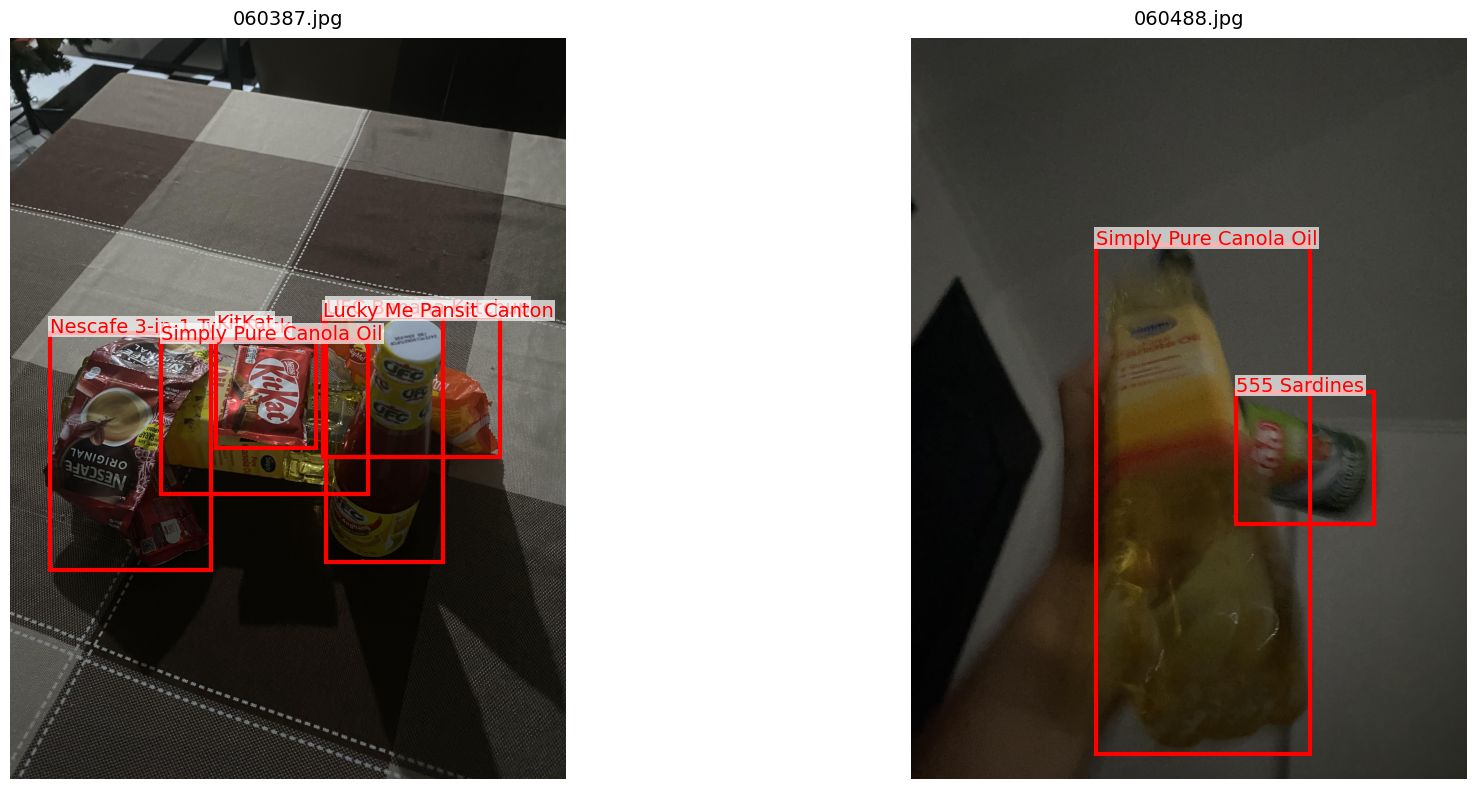

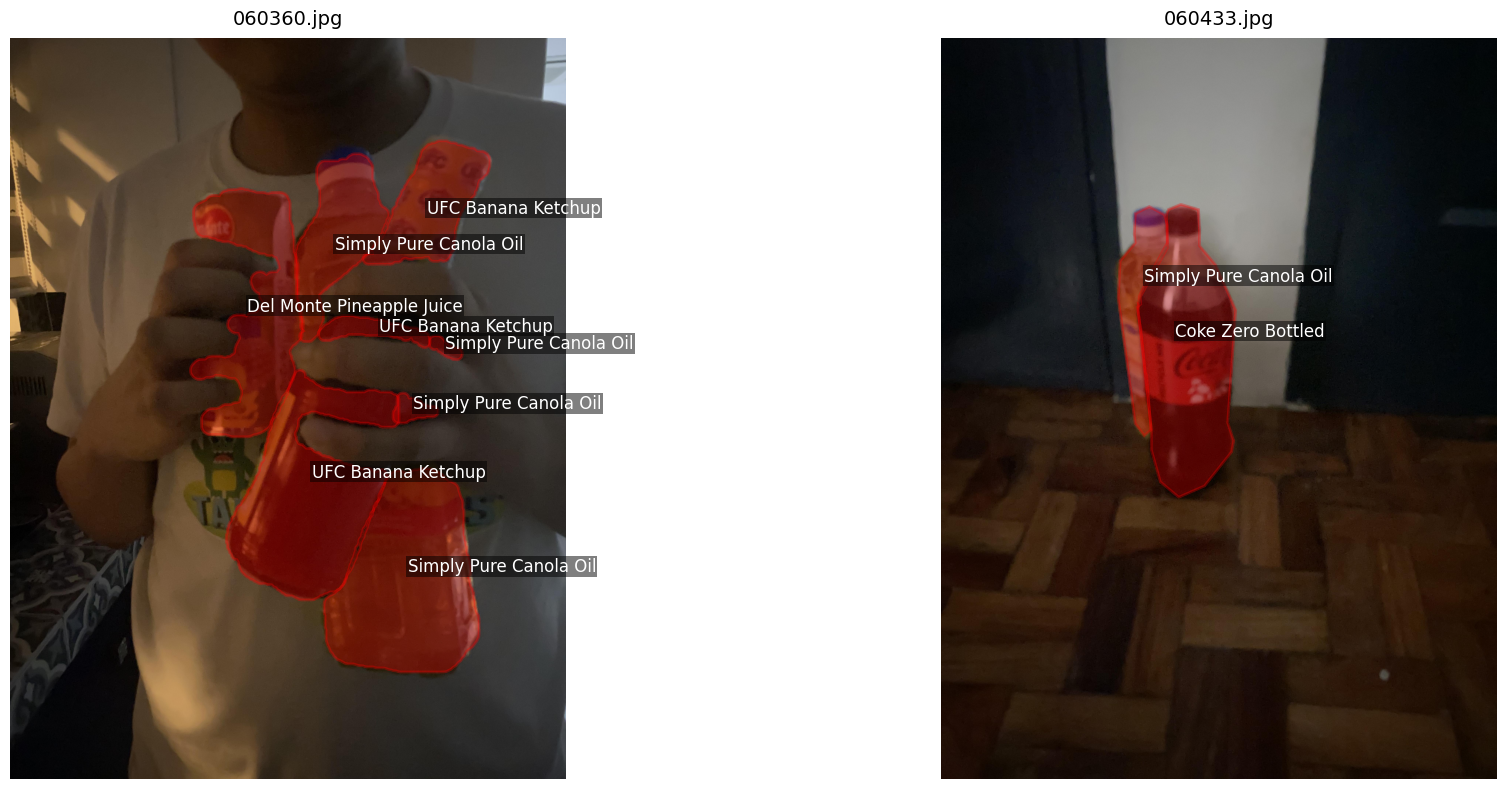

In [22]:
category = '06'
imgs_to_display = 2

task = 'det'
image_dir = f'/data/students/christian/machine_exercises/me6/data_{task}/images/val'
label_dir = f'/data/students/christian/machine_exercises/me6/data_{task}/labels/val'
visualize(category, imgs_to_display=imgs_to_display, image_dir=image_dir, label_dir=label_dir, task_type=task)

task = 'seg'
image_dir = f'/data/students/christian/machine_exercises/me6/data_{task}/images/val'
label_dir = f'/data/students/christian/machine_exercises/me6/data_{task}/labels/val'
visualize(category, imgs_to_display=imgs_to_display, image_dir=image_dir, label_dir=label_dir, task_type=task)

# Model Training

In [8]:
# Train the model
train_results = model_det.train(
    data="/data/students/christian/machine_exercises/me5/data_det/data_det.yaml",  # path to dataset YAML
    epochs=100,  # number of training epochs
    imgsz=640,  # training image size
    patience = 40,
    verbose = True,
    seed = 42,
    plots = True,
    batch = 32, # try 16, 32, 64
    device="cuda:2",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
    # device=[0, 1], for multi-gpu training or device=["cuda:0", "cuda:1"]
)

Ultralytics 8.3.29 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/data/students/christian/machine_exercises/me5/data_det/data_det.yaml, epochs=100, time=None, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:2, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

train: Scanning /raid/students/christian/machine_exercises/me5/data_det/labels/train.cache... 7604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7604/7604 [00:00<?, ?it/s]

train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/140009.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/140057.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/220002.jpg: 5 duplicate labels removed
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/220004.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/220005.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/220011.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/230008.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/train/240001.jpg: 1 duplicate labels 


val: Scanning /raid/students/christian/machine_exercises/me5/data_det/labels/val.cache... 845 images, 0 backgrounds, 0 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]

val: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_det/images/val/230287.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.41G      1.939       4.49      1.954         87        640: 100%|██████████| 238/238 [00:30<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


                   all        845       1862      0.424      0.201      0.175      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.16G      1.145      2.847      1.355         62        640: 100%|██████████| 238/238 [00:28<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]

                   all        845       1862      0.545        0.5      0.532      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.19G     0.9603      1.957      1.198         97        640: 100%|██████████| 238/238 [00:26<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.74it/s]

                   all        845       1862      0.739      0.619      0.716      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.07G     0.8989      1.476      1.132         56        640: 100%|██████████| 238/238 [00:27<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.77it/s]

                   all        845       1862      0.775      0.723       0.78      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.11G     0.8537      1.175       1.09         69        640: 100%|██████████| 238/238 [00:26<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.91it/s]

                   all        845       1862      0.834       0.79      0.862      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.17G     0.7979     0.9941      1.054         72        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.94it/s]

                   all        845       1862      0.885       0.84      0.889      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.23G     0.7787      0.899      1.044         83        640: 100%|██████████| 238/238 [00:26<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.94it/s]

                   all        845       1862      0.853      0.811      0.877      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       5.2G     0.7528     0.8215       1.03         78        640: 100%|██████████| 238/238 [00:28<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.92it/s]

                   all        845       1862      0.911      0.842      0.905      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.18G     0.7313     0.7666      1.019         55        640: 100%|██████████| 238/238 [00:26<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.99it/s]

                   all        845       1862      0.916      0.863      0.912      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.18G     0.7107     0.7286       1.01         64        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        845       1862      0.928      0.854      0.915      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.13G     0.7042     0.7025      1.006         68        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.95it/s]

                   all        845       1862      0.909      0.876      0.914      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.52G      0.695     0.6782     0.9988         69        640: 100%|██████████| 238/238 [00:26<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.97it/s]

                   all        845       1862      0.939      0.864      0.922      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       5.1G     0.6857     0.6592     0.9952         94        640: 100%|██████████| 238/238 [00:26<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.04it/s]

                   all        845       1862      0.924      0.887       0.93      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.19G     0.6775      0.629     0.9947         62        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.79it/s]

                   all        845       1862      0.934      0.887      0.927      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.17G     0.6656     0.6149     0.9836        117        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.09it/s]

                   all        845       1862      0.942      0.882      0.926      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.11G      0.651     0.5904     0.9778        127        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.06it/s]

                   all        845       1862      0.938      0.885      0.929      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.19G     0.6514     0.5925     0.9785         64        640: 100%|██████████| 238/238 [00:26<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.05it/s]

                   all        845       1862      0.934      0.885      0.926      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.19G     0.6475     0.5778     0.9777        104        640: 100%|██████████| 238/238 [00:26<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.05it/s]

                   all        845       1862      0.949      0.891      0.932      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.07G     0.6468     0.5795     0.9821         63        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.03it/s]

                   all        845       1862      0.953      0.893      0.934      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.22G     0.6314      0.556     0.9702         66        640: 100%|██████████| 238/238 [00:26<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.08it/s]

                   all        845       1862      0.954      0.896      0.933      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.08G     0.6316     0.5509     0.9678         98        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.944      0.911      0.936      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.18G     0.6219      0.544      0.968         71        640: 100%|██████████| 238/238 [00:26<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.02it/s]

                   all        845       1862      0.946      0.897      0.939      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.11G     0.6195     0.5323     0.9638         83        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.63it/s]

                   all        845       1862       0.93       0.91      0.938      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.18G     0.6097     0.5225     0.9599         90        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.954      0.907      0.941      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.89G     0.6091     0.5217     0.9614        104        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.957        0.9       0.94      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.17G     0.6031     0.5157     0.9605         74        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.945      0.917      0.941      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.11G     0.6059     0.5125     0.9577         76        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.947      0.907       0.94      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.18G     0.6006     0.4965     0.9536         87        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.953      0.905       0.94      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.19G     0.5977     0.4942      0.954         81        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.964      0.906      0.945      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.11G     0.5917     0.4884     0.9506        101        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.956      0.909      0.943      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.22G     0.5905     0.4924     0.9525         71        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.956      0.911      0.943      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.18G     0.5841     0.4793     0.9476         75        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.09it/s]

                   all        845       1862      0.957      0.909      0.945      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.22G     0.5869     0.4753      0.952         59        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.09it/s]

                   all        845       1862       0.96      0.921      0.945      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.11G     0.5804     0.4689     0.9472         87        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.03it/s]

                   all        845       1862       0.96      0.916      0.944      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.07G     0.5774     0.4727     0.9451        141        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.69it/s]

                   all        845       1862      0.964      0.917      0.945       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.17G     0.5806     0.4692     0.9472         80        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.09it/s]

                   all        845       1862      0.965      0.905      0.942      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.49G     0.5722     0.4609     0.9446         86        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.964      0.921      0.947      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.18G     0.5678     0.4528     0.9414         75        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.962      0.914      0.942      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.94G     0.5648     0.4582     0.9405         58        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.958      0.914      0.943      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.14G     0.5646     0.4455     0.9401         63        640: 100%|██████████| 238/238 [00:26<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]

                   all        845       1862      0.963      0.919      0.946      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.19G     0.5635     0.4468      0.941         71        640: 100%|██████████| 238/238 [00:26<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.964      0.916      0.944      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.21G     0.5663     0.4484      0.941         73        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.972      0.918      0.946      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.32G     0.5594     0.4411      0.936         87        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.965      0.918      0.944      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.07G     0.5511     0.4365     0.9348         75        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.961      0.921      0.947      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.19G     0.5507     0.4304     0.9318        101        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.962      0.928      0.948       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.15G     0.5523     0.4318     0.9333         68        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.09it/s]

                   all        845       1862      0.969      0.917      0.949      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.19G     0.5423     0.4251      0.931         83        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.08it/s]

                   all        845       1862      0.973       0.92      0.947      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       5.1G     0.5432     0.4226     0.9321         93        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.965      0.925       0.95      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.18G      0.538     0.4207     0.9286         81        640: 100%|██████████| 238/238 [00:26<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.68it/s]

                   all        845       1862      0.974      0.917      0.947      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.22G     0.5325     0.4102     0.9247         86        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.09it/s]

                   all        845       1862      0.962      0.929       0.95      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.17G     0.5387     0.4114     0.9277         90        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.969      0.918      0.949      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       5.2G     0.5359     0.4071     0.9269         97        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.974      0.919      0.949       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.07G     0.5299      0.412     0.9273         94        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862       0.97      0.924      0.949      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.11G     0.5323     0.4098      0.927        129        640: 100%|██████████| 238/238 [00:26<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.965      0.925      0.949      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.18G     0.5277     0.4048     0.9254         82        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862       0.97      0.927      0.951       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.18G      0.518     0.3959     0.9196         82        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.973      0.925      0.953      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.11G     0.5204     0.3968     0.9209        113        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.969      0.924      0.952      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       5.1G     0.5198     0.3983     0.9213        104        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.972      0.924      0.952      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       5.1G     0.5139       0.39     0.9201         49        640: 100%|██████████| 238/238 [00:26<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.964       0.93      0.951      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.19G     0.5169     0.3899     0.9171        116        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.10it/s]

                   all        845       1862      0.968      0.926      0.951      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.11G     0.5151     0.3914     0.9203         82        640: 100%|██████████| 238/238 [00:26<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.975      0.923      0.953      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.92G      0.513      0.388     0.9211         73        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.68it/s]

                   all        845       1862       0.97      0.927      0.952      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.18G     0.5087     0.3817      0.918        100        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.975      0.924      0.953      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       5.1G     0.5055     0.3764     0.9169         46        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.966      0.928      0.951      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.19G     0.5061     0.3794     0.9152         70        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.973      0.929       0.95      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.17G     0.5004     0.3755     0.9143         74        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.974      0.926      0.952      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.18G     0.4992     0.3698      0.914         75        640: 100%|██████████| 238/238 [00:26<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.73it/s]

                   all        845       1862      0.975      0.928      0.951      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.15G     0.4939     0.3739     0.9116         72        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.974      0.929      0.951      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       5.6G      0.493     0.3717     0.9127         68        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]

                   all        845       1862      0.973      0.929      0.952      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.19G     0.4902     0.3633     0.9115         95        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]

                   all        845       1862      0.974      0.926      0.952      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.21G     0.4946     0.3689     0.9113         73        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.974      0.929      0.952      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.15G     0.4954     0.3661     0.9106         84        640: 100%|██████████| 238/238 [00:26<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.975      0.931      0.952      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.11G     0.4902     0.3668     0.9105         84        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.979      0.928      0.952       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.06G     0.4868     0.3609     0.9087         68        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.977      0.929      0.952      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.15G     0.4805     0.3551     0.9068         72        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.15it/s]

                   all        845       1862      0.974      0.931      0.952      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.17G     0.4852     0.3598      0.908         97        640: 100%|██████████| 238/238 [00:26<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.977      0.931      0.952      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.18G     0.4836     0.3538     0.9082         63        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.15it/s]

                   all        845       1862      0.976      0.931      0.953       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.22G     0.4773     0.3511     0.9062         73        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.977       0.93      0.953      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.18G     0.4774      0.347     0.9032         67        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.975       0.93      0.953      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.11G      0.474     0.3427     0.9047         68        640: 100%|██████████| 238/238 [00:26<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.73it/s]

                   all        845       1862      0.971      0.931      0.953      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.21G     0.4797     0.3477     0.9089         57        640: 100%|██████████| 238/238 [00:26<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.15it/s]

                   all        845       1862      0.974      0.931      0.954      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.09G     0.4739     0.3437     0.9049         87        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.975      0.929      0.954      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.22G     0.4687     0.3404     0.9023         94        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.974      0.929      0.954      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.17G     0.4639     0.3352     0.9025        106        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.972      0.932      0.954      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.18G     0.4594     0.3347     0.9015         73        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.975      0.929      0.953      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.17G     0.4594     0.3283     0.8978        112        640: 100%|██████████| 238/238 [00:26<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.975      0.931      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       5.2G     0.4639     0.3335     0.9002         96        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.11it/s]

                   all        845       1862      0.974      0.932      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       5.5G     0.4656     0.3356     0.9037         92        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.973      0.933      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.15G      0.456     0.3289     0.8962         90        640: 100%|██████████| 238/238 [00:26<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.13it/s]

                   all        845       1862      0.972      0.933      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.15G     0.4535     0.3233      0.898         66        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.971      0.932      0.953      0.894


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.06G     0.3754     0.2487     0.8376         27        640: 100%|██████████| 238/238 [00:27<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.06it/s]

                   all        845       1862      0.977       0.93      0.952      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.17G     0.3724     0.2455     0.8376         42        640: 100%|██████████| 238/238 [00:26<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.08it/s]

                   all        845       1862      0.978      0.929      0.953      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.19G      0.366     0.2388     0.8311         39        640: 100%|██████████| 238/238 [00:26<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.08it/s]

                   all        845       1862      0.975      0.931      0.953      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.88G     0.3625     0.2388     0.8307         44        640: 100%|██████████| 238/238 [00:26<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.08it/s]

                   all        845       1862      0.975      0.931      0.953      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.12G     0.3616     0.2351     0.8313         37        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.01it/s]

                   all        845       1862      0.977      0.932      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.22G     0.3583     0.2336     0.8311         32        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]

                   all        845       1862      0.977      0.931      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.05G     0.3555     0.2312       0.83         39        640: 100%|██████████| 238/238 [00:26<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.15it/s]

                   all        845       1862      0.975      0.933      0.953      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.18G     0.3494     0.2271     0.8277         24        640: 100%|██████████| 238/238 [00:26<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.16it/s]

                   all        845       1862      0.978       0.93      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.07G     0.3479     0.2247     0.8296         34        640: 100%|██████████| 238/238 [00:26<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        845       1862      0.978       0.93      0.953      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.15G     0.3461     0.2216     0.8236         51        640: 100%|██████████| 238/238 [00:26<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.14it/s]

                   all        845       1862      0.977       0.93      0.953      0.895



100 epochs completed in 0.813 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 5.5MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]


                   all        845       1862      0.974      0.929      0.954      0.895
          bottled_soda         37         37      0.989      0.973      0.994      0.941
                cheese         40         58      0.977      0.966      0.988      0.935
                Kitkat         42         47      0.978      0.934      0.976      0.916
                coffee         30         66      0.994      0.939      0.971        0.9
        condensed_milk         37         52      0.976          1      0.992       0.96
           Cooking_oil         40         40      0.992          1      0.995      0.937
           corned beef         41        247      0.976      0.976      0.987      0.926
                garlic         33         33      0.987      0.939       0.99      0.896
       instant_noodles         30         30       0.99          1      0.995      0.983
               ketchup         35         35      0.991          1      0.995      0.995
                 lemo

In [9]:
# Train the model
train_results = model_seg.train(
    data="/data/students/christian/machine_exercises/me5/data_seg/data_seg.yaml",  # path to dataset YAML
    epochs=100,  # number of training epochs
    imgsz=640,  # training image size
    patience = 40,
    verbose = True,
    seed = 42,
    plots = True,
    batch = 32, # try 16, 32, 64
    device="cuda:2",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
    # device=[0, 1], for multi-gpu training or device=["cuda:0", "cuda:1"]
)

Ultralytics 8.3.29 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/data/students/christian/machine_exercises/me5/data_seg/data_seg.yaml, epochs=100, time=None, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:2, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /raid/students/christian/machine_exercises/me5/data_seg/labels/train.cache... 7604 images, 0 backgrounds, 44 corrupt: 100%|██████████| 7604/7604 [00:00<?, ?it/s]

train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/train/020115.jpg: ignoring corrupt image/label: negative label values [ -0.0093915]
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/train/020216.jpg: ignoring corrupt image/label: negative label values [ -0.0006615]
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/train/020219.jpg: ignoring corrupt image/label: negative label values [ -0.0012235]
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/train/030178.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0656]
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/train/040246.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0381      1.1077]
train: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/train/070019.jpg: ignoring corrupt ima


val: Scanning /raid/students/christian/machine_exercises/me5/data_seg/labels/val.cache... 845 images, 0 backgrounds, 7 corrupt: 100%|██████████| 845/845 [00:00<?, ?it/s]

val: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/val/070049.jpg: ignoring corrupt image/label: negative label values [ -0.0024665]
val: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/val/070056.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0013]
val: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/val/070059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0047]
val: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/val/070064.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0024]
val: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/val/070070.jpg: ignoring corrupt image/label: negative label values [  -0.010767]
val: WARNING ⚠️ /raid/students/christian/machine_exercises/me5/data_seg/images/val/090039.jpg: ignoring corrupt image/label: non-

Plotting labels to runs/segment/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train16
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.19G     0.7753      2.386      3.846      1.062         31        640: 100%|██████████| 237/237 [00:46<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]


                   all        838       1828      0.548      0.325      0.335      0.281       0.54       0.32      0.328      0.268

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.11G     0.7812      2.047      2.112      1.038         31        640: 100%|██████████| 237/237 [00:44<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]

                   all        838       1828      0.698      0.637      0.692      0.561      0.692      0.627      0.673      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.19G     0.8448      2.167      1.773      1.062         41        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.35it/s]


                   all        838       1828      0.575      0.344      0.345      0.232      0.581      0.331      0.328      0.206

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.17G     0.9274      2.283      1.752      1.106         35        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]


                   all        838       1828      0.733      0.631      0.715       0.55      0.711      0.609      0.683      0.498

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100       6.1G      0.877      2.189      1.475      1.075         50        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]


                   all        838       1828      0.724      0.653      0.716      0.564      0.711      0.634      0.695      0.531

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.21G     0.8341      2.103      1.296      1.056         30        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

                   all        838       1828      0.733       0.56      0.645        0.5       0.73      0.554       0.63      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.16G     0.7969      2.105      1.145      1.029         29        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.35it/s]

                   all        838       1828      0.873      0.753      0.835      0.683      0.863      0.744      0.817      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.18G     0.7757      2.009      1.037      1.017         37        640: 100%|██████████| 237/237 [00:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]

                   all        838       1828      0.816      0.675      0.781      0.636      0.817      0.655       0.76      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.17G     0.7574      1.995      0.959      1.007         31        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

                   all        838       1828      0.886       0.81       0.87      0.736      0.869      0.804      0.842      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.18G     0.7314      1.923     0.8909      0.996         41        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]

                   all        838       1828      0.906      0.822      0.886       0.75      0.897      0.805      0.865      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.24G     0.7056      1.853     0.8261     0.9808         39        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]

                   all        838       1828      0.871      0.745      0.832      0.697      0.854      0.728      0.804       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.14G     0.6927      1.851     0.7964     0.9775         35        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]

                   all        838       1828      0.911      0.838      0.898       0.77      0.894      0.827      0.876      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.12G     0.6866      1.838     0.7636     0.9798         34        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        838       1828      0.944      0.823      0.894      0.767      0.939       0.82       0.88      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.51G     0.6715       1.81      0.732     0.9692         34        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]

                   all        838       1828      0.911      0.845      0.899      0.777      0.895      0.832      0.876      0.734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.24G     0.6632      1.801     0.7194     0.9655         21        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

                   all        838       1828      0.916      0.834       0.89      0.769      0.908      0.826      0.876       0.73



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.21G     0.6562      1.763     0.6976     0.9629         51        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        838       1828      0.922      0.869      0.908      0.789      0.921      0.845       0.89      0.743



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.12G     0.6418      1.713     0.6663     0.9571         32        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828      0.931      0.874      0.913      0.803      0.921      0.866      0.897      0.755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.1G     0.6375      1.766     0.6569     0.9539         27        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        838       1828      0.937      0.875       0.91      0.803      0.932      0.868      0.899      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.12G     0.6322      1.713      0.635     0.9531         30        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        838       1828      0.941      0.874      0.915      0.803      0.938      0.866      0.899       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.09G     0.6243      1.683     0.6219     0.9484         36        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]

                   all        838       1828      0.953      0.885      0.921      0.815      0.953      0.875      0.908      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.17G     0.6193      1.691     0.6134     0.9474         28        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828      0.937      0.871      0.912       0.81       0.93      0.864      0.897      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.34G     0.6149      1.649     0.6025     0.9442         27        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        838       1828      0.944       0.88      0.923      0.821      0.931      0.869        0.9      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       6.5G      0.606      1.654     0.5918     0.9419         31        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.942      0.877       0.92      0.818      0.932      0.871      0.901      0.773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.31G     0.6044      1.643     0.5833     0.9386         82        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.951       0.89      0.921      0.825      0.945      0.884      0.909      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.18G      0.605      1.643      0.576     0.9381         48        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.953      0.881      0.921       0.82      0.951      0.877       0.91      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.08G     0.5931      1.623     0.5658     0.9358         22        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        838       1828      0.944      0.884      0.917       0.82      0.938       0.88      0.905      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.07G      0.587      1.605     0.5573     0.9329         48        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828       0.95      0.882       0.92      0.827      0.945      0.877      0.908      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.04G     0.5838      1.615     0.5456      0.932         50        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.938      0.894      0.918      0.822      0.931       0.89      0.906      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.06G     0.5767      1.565      0.535     0.9271         60        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        838       1828      0.957      0.881      0.922      0.833      0.958      0.876      0.913      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.23G     0.5799      1.576     0.5338     0.9293         31        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]

                   all        838       1828      0.952      0.895      0.922      0.835      0.948       0.89       0.91      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100       6.1G     0.5672      1.552     0.5229      0.926         34        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828       0.94      0.906      0.927      0.835      0.933      0.901      0.914      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.14G     0.5748      1.574     0.5221     0.9293         27        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]

                   all        838       1828      0.962      0.904       0.93      0.843      0.959      0.897      0.919      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.14G     0.5736      1.556     0.5196     0.9262         61        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.961      0.904      0.927      0.841      0.957      0.901      0.918      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.23G     0.5674      1.555     0.5132     0.9237         20        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828      0.961      0.893      0.925      0.842      0.957       0.89      0.917      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100         6G     0.5585      1.535     0.5042     0.9214         21        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828      0.964      0.902      0.927      0.849      0.959      0.898      0.916      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.11G     0.5565      1.511      0.499     0.9211         39        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.965        0.9       0.93      0.849      0.961      0.896       0.92      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.14G     0.5508      1.519     0.4872     0.9177         28        640: 100%|██████████| 237/237 [00:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.963      0.908      0.933      0.851      0.956      0.901      0.919       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.16G     0.5443      1.518      0.484     0.9153         35        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.38it/s]

                   all        838       1828      0.956      0.906       0.93      0.852      0.951      0.901       0.92      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.05G     0.5497      1.499     0.4898     0.9167         31        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        838       1828      0.966      0.903       0.93      0.848      0.958      0.896       0.92      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.13G      0.544       1.47     0.4789     0.9143         54        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828      0.966      0.902      0.932      0.852       0.96      0.896      0.919      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.11G      0.543      1.481     0.4712     0.9145         27        640: 100%|██████████| 237/237 [00:48<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]

                   all        838       1828      0.958      0.914      0.932      0.858      0.953      0.909      0.923      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.08G     0.5428      1.491     0.4682     0.9105         32        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.969      0.908      0.935      0.857      0.962      0.903      0.925       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.97G     0.5327       1.44     0.4667     0.9105         46        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        838       1828      0.961      0.907      0.931      0.857      0.958      0.904      0.922      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.97G     0.5365      1.451     0.4658     0.9096         30        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.963      0.917      0.934      0.864      0.955      0.908      0.922      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.08G     0.5293      1.439     0.4564     0.9087         18        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828      0.965      0.916      0.937      0.865      0.961       0.91      0.928      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.24G     0.5266      1.465     0.4575      0.908         36        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.969      0.912      0.937      0.865      0.961      0.906      0.925      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.21G     0.5275      1.432     0.4494     0.9084         41        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.955      0.914      0.935       0.87      0.957      0.902      0.926      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.21G     0.5221      1.426     0.4443     0.9036         33        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        838       1828      0.971       0.91      0.936      0.868      0.965      0.904      0.925      0.827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.25G     0.5193       1.43     0.4428     0.9035         12        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.969       0.91      0.935      0.867      0.966      0.906      0.926       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.24G     0.5242      1.433     0.4415     0.9068         41        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.974      0.912      0.935      0.865      0.973      0.904      0.924      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.16G     0.5163       1.42     0.4395     0.9048         29        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.973      0.907      0.937      0.868      0.968        0.9      0.927      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.16G     0.5164      1.408     0.4364     0.9026         20        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.968      0.908      0.935      0.867      0.963      0.904      0.925       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.22G      0.514      1.408     0.4315      0.902         44        640: 100%|██████████| 237/237 [00:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.972      0.913      0.939       0.87      0.966      0.908      0.929      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.23G     0.5134      1.412     0.4268     0.8987         95        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.973      0.911      0.939      0.871      0.969      0.907      0.931      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100       6.1G     0.5087      1.405     0.4239     0.8985         39        640: 100%|██████████| 237/237 [00:48<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.975      0.908      0.937      0.868      0.972      0.905      0.929      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.33G     0.5062      1.372     0.4228     0.9006         48        640: 100%|██████████| 237/237 [00:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.974      0.911      0.938      0.872       0.97      0.907      0.929      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.18G     0.5089      1.412      0.418     0.8996         58        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.973      0.911      0.935      0.871      0.968      0.906      0.926      0.835



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.21G     0.4968      1.362     0.4115     0.8965         29        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

                   all        838       1828      0.968      0.913      0.937      0.872      0.965      0.908      0.928      0.835



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.09G     0.5036      1.361     0.4163     0.8987         31        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828      0.967      0.912      0.936       0.87      0.962      0.907      0.926      0.836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       6.2G     0.4956      1.359     0.4051      0.894         20        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        838       1828      0.975      0.912       0.94      0.877      0.968      0.907      0.929       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.07G     0.4934      1.345      0.403     0.8967         27        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.976      0.912      0.937      0.876      0.972      0.909      0.928      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.18G     0.4948      1.343     0.4055     0.8952         29        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.972      0.915      0.939      0.876      0.964       0.91      0.928      0.839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       6.1G       0.49      1.299     0.4022     0.8935         23        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828      0.978       0.91      0.937      0.875       0.97      0.904      0.927      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.13G     0.4895      1.337     0.3964     0.8917         37        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828       0.98      0.916      0.939      0.878      0.976      0.913      0.933      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.29G     0.4882      1.303     0.3922     0.8916         42        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        838       1828      0.976      0.918       0.94      0.878      0.971      0.914      0.932      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.15G     0.4827      1.338     0.3895      0.892         26        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.973      0.915      0.941       0.88      0.971       0.91      0.935      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.25G     0.4837      1.317     0.3909     0.8922         29        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.969      0.915      0.939      0.879      0.972      0.905      0.932      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.14G     0.4817      1.316     0.3871     0.8902         29        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828      0.975      0.914       0.94       0.88      0.971      0.909       0.93      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.03G     0.4819      1.293     0.3916     0.8904         37        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]

                   all        838       1828      0.976      0.912       0.94      0.882      0.971      0.908      0.931      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.13G     0.4758      1.287     0.3797     0.8881         36        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        838       1828      0.969      0.919      0.939      0.881      0.964      0.913      0.931      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.17G     0.4725      1.289      0.379     0.8891         27        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.971      0.917       0.94      0.882      0.971      0.911      0.933      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.17G      0.473      1.256     0.3791     0.8889         45        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        838       1828      0.976      0.914       0.94      0.882      0.973       0.91      0.932       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       6.1G     0.4756      1.288     0.3775     0.8874         27        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.974      0.915      0.941      0.883       0.97      0.912      0.933      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.05G     0.4669      1.296     0.3688     0.8871         26        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

                   all        838       1828      0.975      0.915      0.941      0.885       0.97      0.911      0.932       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.12G      0.471       1.31      0.374     0.8884         22        640: 100%|██████████| 237/237 [00:43<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]

                   all        838       1828      0.973      0.919      0.941      0.885      0.967      0.915      0.933      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.28G     0.4711      1.271     0.3725     0.8861         41        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.969      0.922      0.942      0.887      0.962      0.918      0.933      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.24G     0.4681      1.275     0.3648     0.8844         26        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.972      0.918      0.943      0.887      0.966      0.913      0.934      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.07G     0.4628      1.259     0.3577     0.8839         22        640: 100%|██████████| 237/237 [00:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        838       1828      0.978      0.917      0.943      0.886      0.973      0.913      0.936      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100       6.1G     0.4615      1.254     0.3595     0.8842         33        640: 100%|██████████| 237/237 [00:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.978      0.918      0.943      0.888      0.971      0.913      0.935      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.22G      0.464      1.278     0.3604     0.8839         30        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828      0.973      0.919      0.944       0.89       0.97      0.913      0.935      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.17G     0.4546       1.21     0.3523     0.8824         25        640: 100%|██████████| 237/237 [00:45<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]

                   all        838       1828      0.972       0.92      0.942      0.887      0.965      0.915      0.933      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100       6.1G     0.4543      1.256     0.3534     0.8797         65        640: 100%|██████████| 237/237 [00:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828       0.98      0.918      0.942      0.888      0.974      0.914      0.935      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.23G     0.4504      1.219     0.3512     0.8806         23        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.979      0.917      0.941      0.887      0.973      0.913      0.933      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.48G     0.4558      1.231     0.3502     0.8802         27        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828      0.979      0.919      0.942      0.888      0.974      0.916      0.934      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.31G     0.4464      1.216     0.3439     0.8768         41        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        838       1828      0.976      0.918      0.943      0.889      0.971      0.914      0.935      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.11G     0.4491      1.226     0.3451     0.8796         20        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.978      0.916      0.943      0.891      0.971      0.912      0.934      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100       6.2G     0.4434      1.203     0.3385     0.8763         28        640: 100%|██████████| 237/237 [00:48<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.976       0.92      0.943      0.892      0.969      0.914      0.934      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.08G     0.4399      1.219     0.3369     0.8773         22        640: 100%|██████████| 237/237 [00:43<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        838       1828      0.979      0.916      0.943      0.891      0.971      0.912      0.934      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.28G     0.4414      1.181     0.3352      0.875         62        640: 100%|██████████| 237/237 [00:43<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.977      0.915      0.943      0.891      0.971       0.91      0.934      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.32G     0.4367      1.191     0.3305     0.8739         21        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        838       1828      0.974      0.918      0.943       0.89      0.967      0.911      0.933      0.854


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.24G     0.3795      1.113      0.266     0.8373         33        640: 100%|██████████| 237/237 [00:44<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828       0.97      0.921      0.943       0.89      0.962      0.914      0.932      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100         6G      0.373      1.071     0.2561     0.8348         11        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

                   all        838       1828      0.978      0.916      0.943      0.889      0.969      0.911      0.932      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.18G     0.3677      1.045     0.2512     0.8321         12        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.979      0.916      0.943      0.889      0.969       0.91      0.932      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100         6G     0.3676      1.032     0.2503     0.8303         15        640: 100%|██████████| 237/237 [00:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        838       1828       0.98      0.914      0.944      0.889       0.97       0.91      0.933      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.01G     0.3644      1.038     0.2487      0.829         11        640: 100%|██████████| 237/237 [00:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        838       1828      0.981      0.914      0.944       0.89      0.972      0.908      0.932      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.07G     0.3597      1.014     0.2432     0.8316         13        640: 100%|██████████| 237/237 [00:48<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]

                   all        838       1828      0.983      0.913      0.943       0.89      0.971      0.909      0.933      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.99G     0.3582      1.009      0.244     0.8295         11        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]

                   all        838       1828      0.982      0.914      0.943       0.89      0.973      0.909      0.933      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.05G      0.356      1.016     0.2393      0.826         14        640: 100%|██████████| 237/237 [00:44<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.982      0.914      0.944      0.891      0.972      0.908      0.932      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.03G      0.354      1.007     0.2383     0.8296         22        640: 100%|██████████| 237/237 [00:43<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        838       1828      0.981      0.914      0.944      0.891      0.971      0.907      0.931      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100         6G     0.3526     0.9847     0.2362     0.8276         17        640: 100%|██████████| 237/237 [00:44<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        838       1828      0.981      0.914      0.944      0.891      0.961      0.914      0.932      0.852



100 epochs completed in 1.346 hours.
Optimizer stripped from runs/segment/train16/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train16/weights/best.pt, 6.0MB

Validating runs/segment/train16/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.82it/s]


                   all        838       1828      0.976      0.919      0.943      0.891      0.969      0.914      0.934      0.857
          bottled_soda         37         37      0.974          1      0.995      0.951      0.973          1      0.995      0.922
                cheese         40         64      0.995      0.859      0.909      0.848      0.994      0.859      0.909      0.838
                Kitkat         42         47      0.998      0.979      0.984      0.932      0.998      0.979      0.984      0.915
                coffee         30         66      0.982      0.909      0.945      0.887      0.965      0.894      0.933      0.875
        condensed_milk         37         54      0.975      0.963      0.969      0.942      0.975      0.963      0.969      0.933
           Cooking_oil         40         42      0.992      0.952      0.972      0.923      0.992      0.952      0.972      0.905
           corned beef         36        179      0.972      0.966   

# Model Export

In [ ]:
# Export the model to TensorRT format
results = model_det.export(format='TensorRT', device="cuda:2")  # export the model to TensorRT format


# 💡 ProTip: Export to OpenVINO for up to 3x CPU speedup.
# 💡 ProTip: Export to TensorRT for up to 5x GPU speedup.

In [9]:
ft_model_det.export(format="TensorRT", device="cuda:2")

Ultralytics 8.3.29 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)

PyTorch: starting from '/data/students/christian/machine_exercises/me5/runs/detect/train13/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 28, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.39...
ONNX: export success ✅ 1.5s, saved as '/data/students/christian/machine_exercises/me5/runs/detect/train13/weights/best.onnx' (10.1 MB)

TensorRT: starting export with TensorRT 10.6.0...
[11/14/2024-10:43:58] [TRT] [I] [MemUsageChange] Init CUDA: CPU +2, GPU +0, now: CPU 1021, GPU 27000 (MiB)
[11/14/2024-10:44:06] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +2015, GPU +374, now: CPU 3192, GPU 27374 (MiB)
[11/14/2024-10:44:06] [TRT] [I] ----------------------------------------------------------------
[11/14/2024-10:44:06] [TRT] [I] Input filename:   /data/students/christian/machine_exercises/me5/runs/de

'/data/students/christian/machine_exercises/me5/runs/detect/train13/weights/best.engine'

In [10]:
ft_model_seg.export(format="TensorRT", device="cuda:2")

Ultralytics 8.3.29 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)

PyTorch: starting from '/data/students/christian/machine_exercises/me5/runs/segment/train16/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 60, 8400), (1, 32, 160, 160)) (5.7 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.39...
ONNX: export success ✅ 1.9s, saved as '/data/students/christian/machine_exercises/me5/runs/segment/train16/weights/best.onnx' (11.1 MB)

TensorRT: starting export with TensorRT 10.6.0...
[11/14/2024-10:52:33] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +2014, GPU +366, now: CPU 3407, GPU 27690 (MiB)
[11/14/2024-10:52:33] [TRT] [I] ----------------------------------------------------------------
[11/14/2024-10:52:33] [TRT] [I] Input filename:   /data/students/christian/machine_exercises/me5/runs/segment/train16/weights/best.onnx
[11/14/2024-10:52:33] [TRT] [I] ONNX IR version:  0.

'/data/students/christian/machine_exercises/me5/runs/segment/train16/weights/best.engine'